In [3]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Import libraries and read data from the file.
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/breast_cancer.csv')
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [7]:
# Print diagnosis count for each type. (i.e.2 & 4)
df.Class.value_counts()

2    444
4    239
Name: Class, dtype: int64

In [8]:
#Display correlation on the data.
df.corr()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,1.000000,-0.056350,-0.041396,-0.042221,-0.069630,-0.048644,-0.099248,-0.061966,-0.050699,-0.037972,-0.084701
Clump Thickness,-0.056350,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity of Cell Size,-0.041396,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity of Cell Shape,-0.042221,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,-0.069630,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,-0.048644,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,-0.061966,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,-0.050699,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,-0.037972,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448


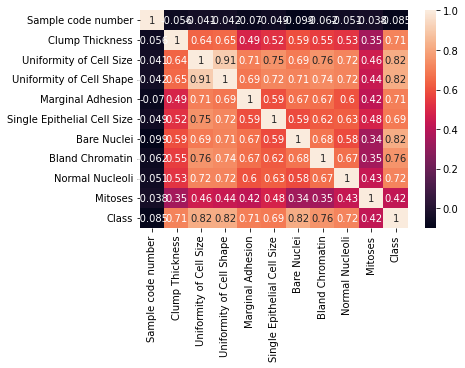

In [11]:
#Plot heatmap with correlation values
sns.heatmap(df.corr(),annot=True)

In [27]:
#Store in X , all columns except sample code and Class , y is Class column
X=df.iloc[:,1:-1].values
X=df.drop(['Sample code number','Class'],axis=1)
y=df.iloc[:,-1].values # or use y=df.Class 


#Perform the following on the Breast_Cancer.csv dataset. 

In [28]:
# Apply splitting on the dataset as70% for training and 30% for testing.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [30]:
# Apply splitting on the dataset as70% for training and 30% for testing.
from sklearn.ensemble import RandomForestClassifier 

rft=RandomForestClassifier()
rft.fit(X_train,y_train)


RandomForestClassifier()

In [35]:
# Fit the training data and predict the outcome
y_pred_rft=rft.predict(X_test)

In [39]:
#Apply kfold (10 fold) validation
from sklearn.model_selection import KFold

kf=KFold(n_splits=10)
kf.get_n_splits(y_pred_rft)


10

In [40]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_rft)
cm


array([[126,   4],
       [  7,  68]])

In [41]:
# Display mean accuracy 
accuracy=(cm[0,0]+cm[1,1]/cm.sum())
print("Mean Accuracy:" , accuracy)

Mean Accuracy: 126.33170731707317
